In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-email/spam.csv


In [2]:
df=pd.read_csv("/kaggle/input/spam-email/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


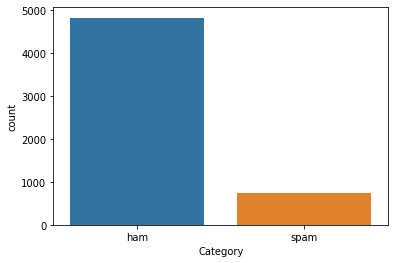

In [3]:
sns.countplot(x="Category", data=df);

In [4]:
df.isnull().sum()/len(df)*100

Category    0.0
Message     0.0
dtype: float64

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [8]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [9]:
df["Length"]=df["Message"].apply(len)
df.head()

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
fig=px.histogram(df, x="Length")
fig.show()

In [11]:
df_spam=df[df["Category"]=="spam"]
df_ham=df[df["Category"]=="ham"]

fig1=px.histogram(df_spam, x="Length", title="Spam")
fig1.show()

fig2=px.histogram(df_ham, x="Length", title="Ham")
fig2.show()

In [12]:
df["Length"].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [13]:
df_spam["Length"].describe()

count    747.000000
mean     137.989290
std       29.980287
min        7.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: Length, dtype: float64

In [14]:
df_ham["Length"].describe()

count    4825.000000
mean       71.448290
std        58.434864
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
df.sort_values("Length", ascending=False)[:20]

,Category,Message,Length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


In [16]:
print(df_spam.shape)
print(df_ham.shape)
print(df.shape)

(747, 3)
(4825, 3)
(5572, 3)


In [17]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [18]:
ps=PorterStemmer()
clean=[]
for i in range(5572):
    yorum=re.sub("[^a-zA-Z]", " ", df["Message"][i])
    comment=yorum.lower()
    comment=comment.split()
    comment=[ps.stem(word) for word in comment if not word in set(stopwords.words("english"))]
    comment=" ".join(comment)
    clean.append(comment)

In [19]:
clean

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=10000)
clean=cv.fit_transform(clean).toarray()

In [21]:
clean

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["Category"]=le.fit_transform(df["Category"])

In [23]:
x=clean
y=df["Category"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=confusion_matrix(y_test,y_pred)
acc=metrics.accuracy_score(y_test, y_pred)
print(acc)
print(cm)

0.8773923444976076
[[1263  168]
 [  37  204]]


In [24]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
y_pred=mnb.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(acc)
print(cm)

0.9706937799043063
[[1402   29]
 [  20  221]]


In [25]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=0)
logr.fit(x_train, y_train)
y_pred=logr.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(acc)
print(cm)

0.9778708133971292
[[1430    1]
 [  36  205]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(acc)
print(cm)

0.9455741626794258
[[1429    2]
 [  89  152]]


In [27]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[1430    1]
 [ 102  139]]
0.9383971291866029
